In [1]:
%matplotlib inline

In [2]:
!ls /vision/group/ntu-rgbd/zane/work_dirs/

50_few_shot_nturgbd_frozen_swin_tiny_rgb.py
50_few_shot_nturgbd_swin_tiny_rgb.py
few_shot_nturgbd_swin_tiny_patch244_window877.py
few_shot_nturgbd_swin_tiny_rgb.py
frozen_nturgbd_swin_tiny_patch244_window877.py
nturgbd_swin_tiny_patch244_window877.py
small_depth_nturgbd_swin_tiny_patch244_window877_0-1Norm_4_exs.py
small_depth_nturgbd_swin_tiny_patch244_window877_0-1Norm.py
small_depth_nturgbd_swin_tiny_patch244_window877.py


In [3]:
!ls /vision/group/ntu-rgbd/zane/work_dirs/nturgbd_swin_tiny_patch244_window877.py

20220131_174809.log	  20220201_000234.log	    epoch_4.pth
20220131_174809.log.json  20220201_000234.log.json  epoch_5.pth
20220131_180856.log	  20220219_220117.log	    epoch_6.pth
20220131_180856.log.json  20220219_220117.log.json  fine-tune-config.py
20220131_182424.log	  epoch_1.pth		    latest.pth
20220131_182424.log.json  epoch_2.pth
20220131_235730.log	  epoch_3.pth


In [4]:
WORK_DIR = '/vision/group/ntu-rgbd/zane/work_dirs/'

files = [WORK_DIR + 'frozen_nturgbd_swin_tiny_patch244_window877.py/20220131_182425.log.json', 
         WORK_DIR + 'nturgbd_swin_tiny_patch244_window877.py/20220201_000234.log.json',
         WORK_DIR + 'small_depth_nturgbd_swin_tiny_patch244_window877.py/20220131_232508.log.json']
legend = ['frozen', 'unfrozen', 'depth']
metric = 'loss' #, 'top1_acc', 'top5_acc']
# Size of dataset 
dataset_size = 12870
step_size = 20 # num examples in each step
num_gpus = 2

In [6]:
# Iterations reset at the end of the epoch
from collections import defaultdict
iter2times = defaultdict(lambda:0) # keeps track of how many times each iter has been seen

def reset_iters():
    iter2times.clear()

def get_real_iter(i):
    val = dataset_size * iter2times[i] + i * num_gpus
    iter2times[i] += 1
    return val

In [7]:
import numpy as np
import json
steps = []
for line in open(files[1], 'r'):
    steps.append(json.loads(line))

modes = []
for step in steps[1:]:
    if step['mode'] == 'val':
        print(step)

{'mode': 'val', 'epoch': 1, 'iter': 805, 'lr': 0.0, 'memory': 8175, 'data_time': 0.24246, 'top1_acc': 0.54783, 'top5_acc': 0.91988, 'loss_cls': 1.68449, 'loss': 1.68449, 'time': 0.45878}
{'mode': 'val', 'epoch': 1, 'iter': 805, 'lr': 0.0, 'memory': 8175, 'data_time': 0.03818, 'top1_acc': 0.54783, 'top5_acc': 0.91988, 'loss_cls': 1.68449, 'loss': 1.68449, 'time': 0.26299}
{'mode': 'val', 'epoch': 2, 'iter': 805, 'lr': 1e-05, 'memory': 8175, 'data_time': 0.26304, 'top1_acc': 0.73975, 'top5_acc': 0.97888, 'loss_cls': 0.81732, 'loss': 0.81732, 'time': 0.47749}
{'mode': 'val', 'epoch': 2, 'iter': 805, 'lr': 1e-05, 'memory': 8175, 'data_time': 0.03797, 'top1_acc': 0.73975, 'top5_acc': 0.97888, 'loss_cls': 0.81732, 'loss': 0.81732, 'time': 0.26201}
{'mode': 'val', 'epoch': 3, 'iter': 805, 'lr': 1e-05, 'memory': 8175, 'data_time': 0.31454, 'top1_acc': 0.79193, 'top5_acc': 0.99068, 'loss_cls': 0.58341, 'loss': 0.58341, 'time': 0.52784}
{'mode': 'val', 'epoch': 3, 'iter': 805, 'lr': 1e-05, 'memo

In [8]:
modes = ['train', 'val']
key2data = {}
for file, key in zip(files, legend):
    steps = []
    for line in open(file, 'r'):
        steps.append(json.loads(line))
    mode2steps = {}
    for mode in modes:
        reset_iters()
        mode2steps[mode] = []
        if mode == 'train':
            mode2steps['iter'] = []           
            for s, step in enumerate(steps[1:]): # First step is env_info
                if step['mode'] == 'train':
                    mode2steps[mode].append(step[metric])
                    mode2steps['iter'].append(get_real_iter(step['iter']))

        elif mode == 'val':
            mode2steps['epoch'] = []
            for step in steps[1:]:
                if step['mode'] == 'val':
                    mode2steps[mode].append(step[metric])
                    mode2steps['epoch'].append(step['epoch'] * dataset_size)
    
    key2data[key] = mode2steps
        

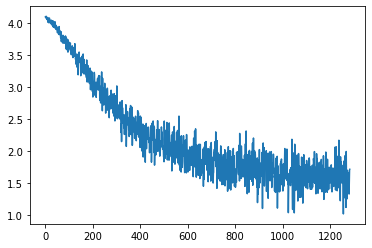

In [9]:
import matplotlib.pyplot as plt
plt.plot(key2data['frozen']['train'])

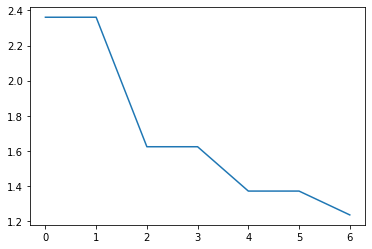

In [10]:
plt.plot(key2data['frozen']['val'])

In [11]:
key2data['unfrozen']['val']

[1.68449,
 1.68449,
 0.81732,
 0.81732,
 0.58341,
 0.58341,
 0.47711,
 0.47711,
 0.46792,
 0.46792,
 0.42318,
 0.42318]

In [12]:
key2data['depth']['val']

[4.18036, 4.16696, 4.17306, 4.13934, 4.12894]

In [13]:
print(4 * dataset_size)

51480


plotting frozen
plotting unfrozen
plotting depth
plotting train for depth
plotting val for depth


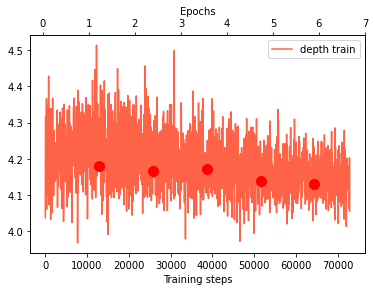

In [14]:
tr_colors = ['tab:blue', 'tab:green', 'tomato']
val_colors = ['b', 'g', 'r'] # Needs to be same length as keys

for key, t_c, v_c in zip(key2data, tr_colors, val_colors):
    print("plotting", key)
    if key == 'depth':
        for mode in modes:
            print("plotting", mode, "for", key)
            if mode == 'train':
                plt.plot(key2data[key]['iter'], key2data[key][mode], label=key + ' train', zorder=1, c=t_c)
                plt.legend()
            elif mode == 'val':
                plt.scatter(key2data[key]['epoch'], key2data[key][mode], s=100, c=v_c, marker='o', zorder=2)
                plt.legend()

axes1 = plt.gca()
axes2 = axes1.twiny()
num_epochs = 7
new_tick_locs = [dataset_size*i for i in range(num_epochs + 1)]
axes2.set_xlim(axes1.get_xlim())
axes2.set_xticks(new_tick_locs)
axes2.set_xticklabels([i for i in range(num_epochs + 1)])
axes2.set_xlabel("Epochs")
axes1.set_xlabel("Training steps")
plt.ylabel("Classification Loss")
#axes1.legend(legend)
plt.savefig('visualization.png')
plt.show()

In [ ]:
# Next step: visualize on validation set